In [1]:
# ============================================================================
# FRAUD DETECTION - SETUP & INITIAL EXPLORATION
# ============================================================================


In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

print('Libraries imported!')
print()

Libraries imported!



In [3]:
# ============================================================================
# STEP 1: Load the dataset
# ============================================================================

df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [4]:
print('Dataset Loaded')
print('='*70)
print(f"Shape:{df.shape}")
print(f"Size:{df.shape[0]:,} rows * {df.shape[1]} columns")
print()

Dataset Loaded
Shape:(6362620, 11)
Size:6,362,620 rows * 11 columns



In [5]:
# ============================================================================
# STEP 2: Initial inspection
# ============================================================================

print('FIRST LOOK AT THE DATA')
print('='*70)
print(df.head())

print('Column Names:')
print(df.columns.tolist())

print('Data Types:')
print(df.dtypes)
print()

print('Basic Info:')
print(df.info())


FIRST LOOK AT THE DATA
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
Column Names:
['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceO

In [6]:
# ============================================================================
# FRAUD DETECTION - INITIAL ANALYSIS
# ============================================================================

print('\n' + '='*70)
print('Fraud Analysis')
print('='*70)

#Check fraud distribution
fraud_counts = df['isFraud'].value_counts()
fraud_percent = df['isFraud'].value_counts(normalize = True)*100

print('Fraud Distribution:')
print(f"Legitimate transactions: {fraud_counts[0]:,} ({fraud_percent[0]:.2f}%)")
print(f"Fraudulent transactions: {fraud_counts[1]:,} ({fraud_percent[1]:.2f}%)")
print()

#Imbalance Ratio
imbalance_ratio = fraud_counts[0]/fraud_counts[1]
print(f"Imbalance Ratio: 1:{imbalance_ratio:.0f}")
print(f" For every 1 fraud, there are {imbalance_ratio:.0f} legitimate transactions!")


#Check Missing values
print("Missing Values:")
print(df.isnull().sum())
print()

#Transaction Types
print("Transaction Types:")
print(df['type'].value_counts())
print()

#Fraud by Transaction Type
print("Fraud by Transaction Type:")
fraud_by_type = df.groupby('type')['isFraud'].agg(['sum','count'])
fraud_by_type['fraud_rate_%'] = (fraud_by_type['sum']/fraud_by_type['count'] *100).round(4)

print(fraud_by_type)
print()

#Amount Statistics
print('Amount Statistics')
print(df.groupby('isFraud')['amount'].describe())
print()


Fraud Analysis
Fraud Distribution:
Legitimate transactions: 6,354,407 (99.87%)
Fraudulent transactions: 8,213 (0.13%)

Imbalance Ratio: 1:774
 For every 1 fraud, there are 774 legitimate transactions!
Missing Values:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Transaction Types:
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

Fraud by Transaction Type:
           sum    count  fraud_rate_%
type                                 
CASH_IN      0  1399284        0.0000
CASH_OUT  4116  2237500        0.1840
DEBIT        0    41432        0.0000
PAYMENT      0  2151495        0.0000
TRANSFER  4097   532909        0.7688

Amount Statistics
             count          mean           std   min         25%        50%  \
isFraud     

In [7]:
# ============================================================================
# DEEP DIVE: Fraud Patterns
# ============================================================================
print("="*70)
print("🔍 DEEP DIVE: FRAUD PATTERNS")
print("="*70)
print()

df_fraud_types = df[df['type'].isin(['TRANSFER','CASH_OUT'])].copy()

print(f"Focusing on fraud-prone transactions:")
print(f" Original dataset: {len(df):,} transactions")
print(f"Fraud-prone only: {len(df_fraud_types):,} transactions ({len(df_fraud_types)/len(df)*100:.1f}%)")
print(f"Fraud cases: {df_fraud_types['isFraud'].sum():,}")

#Check the flagged fraud column
print("System Flagged Fraud:")
print(f" Total flagged: {df['isFlaggedFraud'].sum():,}")
print(f" Actual fraud: {df['isFraud'].sum():,}")

#Check if flagged frauds are actually frauds 
flagged_and_fraud = df[(df['isFlaggedFraud'] == 1) & (df['isFraud'] == 1)]
print(f"Flagged and actually fraud: {len(flagged_and_fraud)}")
print()

🔍 DEEP DIVE: FRAUD PATTERNS

Focusing on fraud-prone transactions:
 Original dataset: 6,362,620 transactions
Fraud-prone only: 2,770,409 transactions (43.5%)
Fraud cases: 8,213
System Flagged Fraud:
 Total flagged: 16
 Actual fraud: 8,213
Flagged and actually fraud: 16



In [8]:
#Balance anomalies
print("Balance anomalies")
df_fraud_types['balance_change_orig'] = df_fraud_types['oldbalanceOrg'] - df_fraud_types['newbalanceOrig'] - df_fraud_types['amount']
df_fraud_types['balance_change_dest'] = df_fraud_types['newbalanceDest'] - df_fraud_types['oldbalanceDest'] - df_fraud_types['amount']

print("Checking for balance inconsistencies...")
print(f" Origin balance errors: {(df_fraud_types['balance_change_orig'] != 0).sum():,}")
print(f" Destination balance errors: {(df_fraud_types['balance_change_dest'] != 0).sum():,}")



Balance anomalies
Checking for balance inconsistencies...
 Origin balance errors: 2,616,656
 Destination balance errors: 2,011,705


In [9]:
print("🔍 ZERO BALANCE PATTERNS (Fraud Indicator?):")
fraud_zero_dest = df_fraud_types[(df_fraud_types['isFraud'] == 1) & (df_fraud_types['oldbalanceDest'] == 0)]
fraud_pct_zero_before = len(fraud_zero_dest) / df_fraud_types['isFraud'].sum() * 100
print(f"   Frauds where destination had $0 before: {len(fraud_zero_dest):,} ({fraud_pct_zero_before:.1f}%)")

fraud_zero_after = df_fraud_types[(df_fraud_types['isFraud'] == 1) & (df_fraud_types['newbalanceDest'] == 0)]
fraud_pct_zero_after = len(fraud_zero_after) / df_fraud_types['isFraud'].sum() * 100
print(f"   Frauds where destination has $0 after: {len(fraud_zero_after):,} ({fraud_pct_zero_after:.1f}%)")
print()

🔍 ZERO BALANCE PATTERNS (Fraud Indicator?):
   Frauds where destination had $0 before: 5,351 (65.2%)
   Frauds where destination has $0 after: 4,091 (49.8%)



In [10]:
# Timing patterns
print("⏰ FRAUD TIMING PATTERNS:")
fraud_by_step = df_fraud_types.groupby('step')['isFraud'].sum().sort_values(ascending=False).head(10)
print("   Top 10 time steps with most fraud:")
print(fraud_by_step)

⏰ FRAUD TIMING PATTERNS:
   Top 10 time steps with most fraud:
step
212    40
523    30
387    28
501    28
730    28
425    28
249    28
398    26
160    26
406    24
Name: isFraud, dtype: int64


In [11]:
# ============================================================================
# FEATURE ENGINEERING - Creating Fraud Indicators
# ============================================================================
print("\n" + "="*70)
print("🛠️ FEATURE ENGINEERING")
print("="*70)
print()

#Work with fraud-prone transactions only
df_model = df_fraud_types.copy()

print(f"Starting with: {len(df_model):,} transactions")
print(f"Fraud rate: {df_model['isFraud'].mean()*100:.4f}")
print()

#Feature 1: Amount-related features
df_model['amount_log'] = np.log1p(df_model['amount'])
df_model['amount_rounded'] = (df_model['amount'] % 1 == 0).astype(int)

#Feature 2: Balance-related features
df_model['orig_balance_zero'] = (df_model['oldbalanceOrg'] ==0).astype(int)
df_model['dest_balance_zero_before'] = (df_model['oldbalanceDest'] == 0).astype(int)
df_model['dest_balance_zero_after'] = (df_model['newbalanceDest'] == 0).astype(int)

#Feature 3: Balance change features
df_model['balance_change_orig'] = df_model['oldbalanceOrg'] - df_model['newbalanceOrig']
df_model['balance_change_dest'] = df_model['oldbalanceDest'] - df_model['newbalanceDest']

#Feature 4: Balance errors (anomalies)
df_model['error_orig'] = (df_model['balance_change_orig'] != df_model['amount']).astype(int)
df_model['error_dest'] = (df_model['balance_change_dest'] != df_model['amount']).astype(int)

#Feature 5: Transaction type 
df_model['is_transfer'] = (df_model['type'] == 'TRANSFER').astype(int)

#Feature 6: Amount vs balance ratio
df_model['amount_orig_ratio'] = df_model['amount']/(df_model['oldbalanceOrg'] + 1)
df_model['amount_dest_ratio'] = df_model['amount']/(df_model['oldbalanceDest'] + 1)

#Feature 7: Time-based
df_model['step_mod_24'] = df_model['step'] % 24

print("Features created:")
print("1. amount_log : log transformed amount")
print("2. amount_rounded : Round number indicator")
print("3. orig_balance_zero : Origin starts at $0")
print("4. dest_balance_zero_before : Destination at $0 before")
print("5. dest_balance_zero_after : Destination at $0 after")
print("6. balance_change_orig : Origin balance change")
print("7. balance_change_dest : Destination balance change")
print("8. error_orig : Origin balance error")
print("9. error_dest : Destination balance error")
print("10. is_transfer : TRANSFER vs CASH_OUT")
print("11. amount_orig_ratio : Amount/Origin balance")
print("12. amount_dest_ratio : Amount/Destination balance")
print("13. step_mod_24 : Hour of Day")

print("Feature Correlation with fraud:")
feature_cols = ['amount_log', 'dest_balance_zero_before', 'dest_balance_zero_after',
                'error_orig', 'error_dest', 'is_transfer', 'amount_orig_ratio']

correlations = df_model[feature_cols + ['isFraud']].corr()['isFraud'].sort_values(ascending = False)
print(correlations)
print()


🛠️ FEATURE ENGINEERING

Starting with: 2,770,409 transactions
Fraud rate: 0.2965

Features created:
1. amount_log : log transformed amount
2. amount_rounded : Round number indicator
3. orig_balance_zero : Origin starts at $0
4. dest_balance_zero_before : Destination at $0 before
5. dest_balance_zero_after : Destination at $0 after
6. balance_change_orig : Origin balance change
7. balance_change_dest : Destination balance change
8. error_orig : Origin balance error
9. error_dest : Destination balance error
10. is_transfer : TRANSFER vs CASH_OUT
11. amount_orig_ratio : Amount/Origin balance
12. amount_dest_ratio : Amount/Destination balance
13. step_mod_24 : Hour of Day
Feature Correlation with fraud:
isFraud                     1.000000
dest_balance_zero_after     0.347722
dest_balance_zero_before    0.080177
amount_log                  0.042649
is_transfer                 0.042400
amount_orig_ratio          -0.011209
error_dest                 -0.044072
error_orig                 -0.2

In [12]:
# ============================================================================
# MACHINE LEARNING - Model Training
# ============================================================================

import subprocess 
import sys

print('Installing imbalanced-learn library...')
subprocess.check_call([sys.executable, '-m', 'pip','install','imbalanced-learn'])
print('Installation complete!')
print()
print("Now restart your kernel and re-run the ML code!")


Installing imbalanced-learn library...
Installation complete!

Now restart your kernel and re-run the ML code!


In [13]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE

In [14]:
# Select features
feature_list = ['amount', 'amount_log', 'oldbalanceOrg', 'newbalanceOrig',
                'oldbalanceDest', 'newbalanceDest', 'orig_balance_zero',
                'dest_balance_zero_before', 'dest_balance_zero_after',
                'error_orig', 'error_dest', 'is_transfer', 
                'amount_orig_ratio', 'amount_dest_ratio', 'step_mod_24']


In [15]:
X = df_model[feature_list]
y = df_model['isFraud']

print(f"Features: {len(feature_list)}")
print(f"Samples: {len(X):,}")
print(f"Fraud Rate: {y.mean()*100:.4f}%")
print()


Features: 15
Samples: 2,770,409
Fraud Rate: 0.2965%



In [16]:
#Train/Test Split
X_train, X_test, y_train,y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42, stratify=y
)

In [17]:
print(f"Training set: {len(X_train):,}({y_train.sum():,} frauds)")
print(f"Test set: {len(X_test):,}({y_test.sum():,} frauds)")
print()

Training set: 2,216,327(6,570 frauds)
Test set: 554,082(1,643 frauds)



In [18]:
#Handle imbalance with SMOTE
print("Handle imbalance with SMOTE...")
smote = SMOTE(random_state = 42, sampling_strategy=0.5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"After SMOTE:")
print(f" Training samples: {len(X_train_balanced):,}")
print(f" Fraud samples: {y_train_balanced.sum():,} ({y_train_balanced.mean()*100:.1f}%)")
print()


Handle imbalance with SMOTE...
After SMOTE:
 Training samples: 3,314,635
 Fraud samples: 1,104,878 (33.3%)



In [19]:
#Train Random Forest
print(" Training Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators =  100,
    max_depth = 20,
    min_samples_split = 10,
    random_state = 42,
    n_jobs = 1,
    class_weight = 'balanced'
)

rf_model.fit(X_train_balanced, y_train_balanced)
print("Random Forest trained!")
print()


 Training Random Forest...
Random Forest trained!



In [20]:
#Predictions 
y_pred_rf = rf_model.predict(X_test)
y_pref_proba_rf = rf_model.predict_proba(X_test)[:,1]



In [21]:
#Evaluation
print('='*70)
print('Random Forest Results')
print('='*70)
print()

print('Classification Report:')
print(classification_report(y_test, y_pred_rf, target_names = ['Legitimate', 'Fraud']))
print()

print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
print()

Random Forest Results

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00    552439
       Fraud       0.98      1.00      0.99      1643

    accuracy                           1.00    554082
   macro avg       0.99      1.00      0.99    554082
weighted avg       1.00      1.00      1.00    554082


Confusion Matrix:
[[552406     33]
 [     5   1638]]



In [23]:
#ROC AUC
roc_auc = roc_auc_score(y_test, y_pref_proba_rf)
print(f"ROC-AUC Score: {roc_auc:.4f}")
print()

ROC-AUC Score: 0.9991



In [24]:
#Feature Importance
feature_importance = pd.DataFrame({
    'Feature': feature_list,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending = False)

print(" Feature Importance:")
print(feature_importance.to_string(index = False))


 Feature Importance:
                 Feature  Importance
              error_orig    0.335506
       amount_orig_ratio    0.274906
           oldbalanceOrg    0.101722
       amount_dest_ratio    0.056515
          newbalanceOrig    0.054143
          newbalanceDest    0.045668
       orig_balance_zero    0.028808
 dest_balance_zero_after    0.024163
             step_mod_24    0.019074
          oldbalanceDest    0.015358
              amount_log    0.014004
                  amount    0.012276
dest_balance_zero_before    0.010772
             is_transfer    0.006291
              error_dest    0.000794


In [28]:
# ============================================================================
# MACHINE LEARNING - MULTIPLE MODELS COMPARISON
# ============================================================================

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import time

In [27]:
import subprocess
import sys

print("📦 Installing XGBoost...")
subprocess.check_call([sys.executable, "-m", "pip", "install", "xgboost"])
print("✅ XGBoost installed!")
print()
print("Now re-run the model training code!")

📦 Installing XGBoost...
✅ XGBoost installed!

Now re-run the model training code!


In [29]:

print("\n" + "="*70)
print("🤖 TRAINING MULTIPLE ML MODELS")
print("="*70)
print()

# Select features
feature_list = ['amount', 'amount_log', 'oldbalanceOrg', 'newbalanceOrig',
                'oldbalanceDest', 'newbalanceDest', 'orig_balance_zero',
                'dest_balance_zero_before', 'dest_balance_zero_after',
                'error_orig', 'error_dest', 'is_transfer', 
                'amount_orig_ratio', 'amount_dest_ratio', 'step_mod_24']



🤖 TRAINING MULTIPLE ML MODELS



In [30]:
X = df_model[feature_list]
y = df_model['isFraud']

print(f"Dataset: {len(X):,} samples, {len(feature_list)} features")
print(f"Fraud rate: {y.mean()*100:.4f}%")
print()

Dataset: 2,770,409 samples, 15 features
Fraud rate: 0.2965%



In [32]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2,random_state = 42, stratify = y
)
print(f"Training: {len(X_train):,} | Test: {len(X_test):,}")
print()

Training: 2,216,327 | Test: 554,082



In [34]:
#Handle imbalance with SMOTE 
print("Applying SMOTE to balance training data...")
smote = SMOTE(random_state = 42, sampling_strategy = 0.5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print(f"After SMOTE: {len(X_train_balanced):,} samples ({y_train_balanced.mean()*100:.1f} % fraud)")
print()

Applying SMOTE to balance training data...
After SMOTE: 3,314,635 samples (33.3 % fraud)



In [35]:
# ============================================================================
# Define all models
# ============================================================================

models = {
    'Logistic Regression': LogisticRegression(max_iter = 1000, random_state = 42, class_weight = 'balanced'),
    'Decision Tree': DecisionTreeClassifier(max_depth = 20, random_state = 42, class_weight = 'balanced'),
    'Random Forest' : RandomForestClassifier(n_estimators = 100, max_depth = 20, random_state = 42, n_jobs = 1, class_weight = 'balanced'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators = 100, max_depth = 10, random_state = 42),
    'XGBoost': XGBClassifier(n_estimators = 100, max_depth = 10, random_state = 42, eval_metric = 'logloss', use_label_encoder = False),
    'AdaBoost': AdaBoostClassifier(n_estimators = 100, random_state = 42),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors = 5, n_jobs = -1)
}

# ============================================================================
# Train and evaluate all models
# ============================================================================

results = []
print("="*70)
print("🏃 TRAINING ALL MODELS...")
print("="*70)
print()

for name, model in models.items():
    print(f"Training {name}...")
    start_time = time.time()
    
    #Train
    model.fit(X_train_balanced, y_train_balanced)
    
    #Predict
    y_pred = model.predict(X_test)
    
    #Get probabilities (if available)
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:,1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None
    
    #Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    train_time = time.time() - start_time
    
    #Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Training Time(s)': train_time
    })
    
    print(f" {name} complete! (Time:{train_time:.2f}s)")
    print()


🏃 TRAINING ALL MODELS...

Training Logistic Regression...
 Logistic Regression complete! (Time:263.34s)

Training Decision Tree...
 Decision Tree complete! (Time:48.19s)

Training Random Forest...
 Random Forest complete! (Time:732.09s)

Training Gradient Boosting...
 Gradient Boosting complete! (Time:4158.91s)

Training XGBoost...
 XGBoost complete! (Time:25.65s)

Training AdaBoost...
 AdaBoost complete! (Time:619.86s)

Training Naive Bayes...
 Naive Bayes complete! (Time:1.90s)

Training KNN...
 KNN complete! (Time:41.43s)



In [37]:
# ============================================================================
# Results comparison
# ============================================================================

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-Score', ascending = False)

print('='*70)
print('Model Comparison Reslts')
print('='*70)
print()
print(results_df.to_string(index = False))
print()


Model Comparison Reslts

              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC  Training Time(s)
  Gradient Boosting  0.999937   0.982593 0.996348  0.989423 0.998419       4158.912839
      Random Forest  0.999928   0.979653 0.996348  0.987930 0.999039        732.094411
            XGBoost  0.999919   0.976730 0.996348  0.986442 0.998486         25.652314
      Decision Tree  0.999901   0.970937 0.996348  0.983479 0.998157         48.189240
           AdaBoost  0.999839   0.951744 0.996348  0.973536 0.998432        619.855393
                KNN  0.992202   0.263428 0.907486  0.408325 0.958625         41.433973
        Naive Bayes  0.970468   0.049130 0.488131  0.089275 0.889979          1.898464
Logistic Regression  0.941391   0.044015 0.905660  0.083949 0.980410        263.338592



In [38]:
#Find best model
best_model_name = results_df.iloc[0]['Model']
best_f1 = results_df.iloc[0]['F1-Score']

print('='*70)
print(f" Best Model: {best_model_name}")
print(f" F1-Score: {best_f1:.4f}")
print('='*70)
print()

 Best Model: Gradient Boosting
 F1-Score: 0.9894



In [39]:
#Save best model for later use
best_model = models[best_model_name]

In [42]:
# ============================================================================
# FRAUD DETECTION VISUALIZATIONS
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*70)
print("📊 CREATING VISUALIZATIONS")
print("="*70)
print()

# Set style
plt.style.use('seaborn-darkgrid')
sns.set_palette("husl")



📊 CREATING VISUALIZATIONS




📊 CREATING VISUALIZATIONS

Creating Viz 1: Model Performance Comparison...


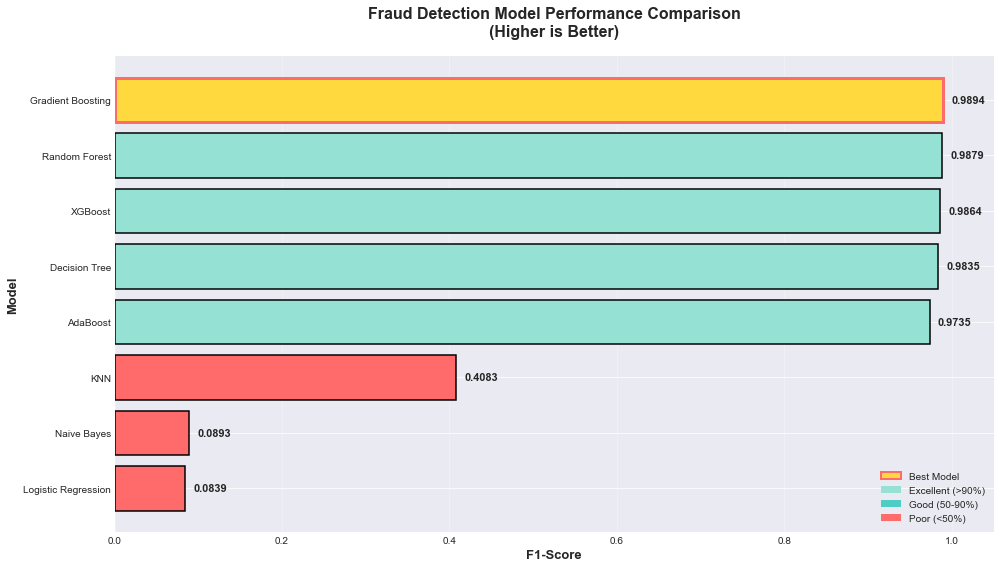

✅ Saved: fraud_viz_01_model_comparison.png



In [44]:
# ============================================================================
# FRAUD DETECTION VISUALIZATIONS
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*70)
print("📊 CREATING VISUALIZATIONS")
print("="*70)
print()

# Set style
plt.style.use('seaborn-darkgrid')
sns.set_palette("husl")

# ============================================================================
# VIZ 1: Model Performance Comparison (F1-Score)
# ============================================================================

print("Creating Viz 1: Model Performance Comparison...")

fig, ax = plt.subplots(figsize=(14, 8))

# Sort by F1-Score
results_sorted = results_df.sort_values('F1-Score', ascending=True)

# Create horizontal bar chart
colors = ['#FF6B6B' if score < 0.5 else '#4ECDC4' if score < 0.9 else '#95E1D3' 
          for score in results_sorted['F1-Score']]

bars = ax.barh(results_sorted['Model'], 
               results_sorted['F1-Score'],
               color=colors,
               edgecolor='black',
               linewidth=1.5)

# Highlight best model
best_idx = results_sorted['F1-Score'].idxmax()
bars[results_sorted.index.get_loc(best_idx)].set_color('#FFD93D')
bars[results_sorted.index.get_loc(best_idx)].set_edgecolor('#FF6B6B')
bars[results_sorted.index.get_loc(best_idx)].set_linewidth(3)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 0.01, bar.get_y() + bar.get_height()/2.,
            f'{width:.4f}',
            ha='left', va='center', fontweight='bold', fontsize=11)

ax.set_xlabel('F1-Score', fontsize=13, fontweight='bold')
ax.set_ylabel('Model', fontsize=13, fontweight='bold')
ax.set_title('Fraud Detection Model Performance Comparison\n(Higher is Better)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlim(0, 1.05)
ax.grid(axis='x', alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FFD93D', edgecolor='#FF6B6B', linewidth=2, label='Best Model'),
    Patch(facecolor='#95E1D3', label='Excellent (>90%)'),
    Patch(facecolor='#4ECDC4', label='Good (50-90%)'),
    Patch(facecolor='#FF6B6B', label='Poor (<50%)')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.tight_layout()
plt.savefig('fraud_viz_01_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: fraud_viz_01_model_comparison.png")
print()

Creating Viz 2: Precision vs Recall Trade-off...


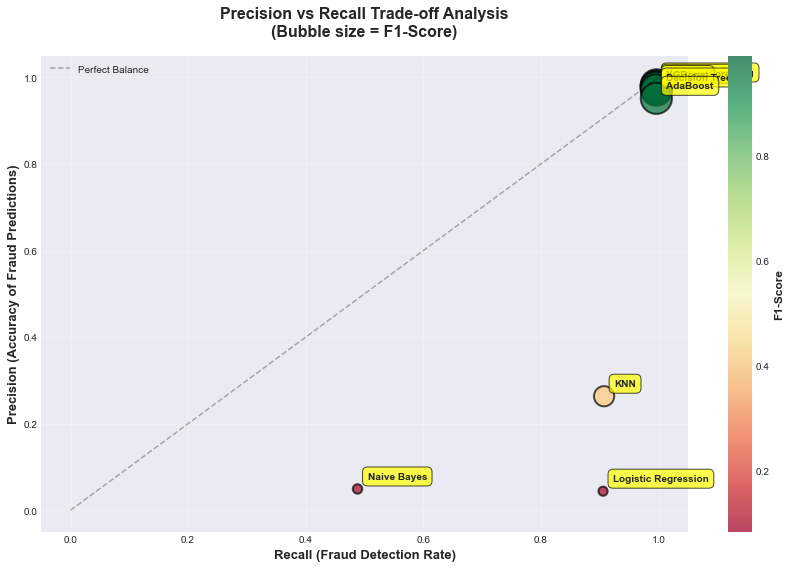

✅ Saved: fraud_viz_02_precision_recall_tradeoff.png



In [45]:
# ============================================================================
# VIZ 2: Precision vs Recall Scatter Plot
# ============================================================================

print("Creating Viz 2: Precision vs Recall Trade-off...")

fig, ax = plt.subplots(figsize=(12, 8))

# Create scatter plot
scatter = ax.scatter(results_df['Recall'], 
                     results_df['Precision'],
                     s=results_df['F1-Score'] * 1000,  # Size by F1-Score
                     c=results_df['F1-Score'],
                     cmap='RdYlGn',
                     alpha=0.7,
                     edgecolors='black',
                     linewidth=2)

# Add model names as labels
for idx, row in results_df.iterrows():
    ax.annotate(row['Model'], 
                (row['Recall'], row['Precision']),
                xytext=(10, 10), 
                textcoords='offset points',
                fontsize=10,
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('F1-Score', fontsize=12, fontweight='bold')

# Styling
ax.set_xlabel('Recall (Fraud Detection Rate)', fontsize=13, fontweight='bold')
ax.set_ylabel('Precision (Accuracy of Fraud Predictions)', fontsize=13, fontweight='bold')
ax.set_title('Precision vs Recall Trade-off Analysis\n(Bubble size = F1-Score)', 
             fontsize=16, fontweight='bold', pad=20)
ax.grid(alpha=0.3)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)

# Add diagonal line (perfect balance)
ax.plot([0, 1], [0, 1], 'k--', alpha=0.3, label='Perfect Balance')
ax.legend(fontsize=10)

plt.tight_layout()
plt.savefig('fraud_viz_02_precision_recall_tradeoff.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: fraud_viz_02_precision_recall_tradeoff.png")
print()

Creating Viz 3: Confusion Matrix (Gradient Boosting)...


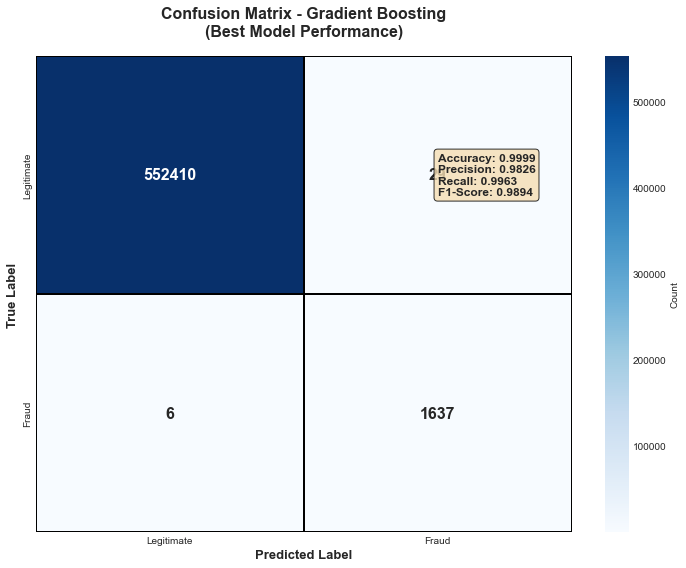

✅ Saved: fraud_viz_03_confusion_matrix.png



In [47]:
# ============================================================================
# VIZ 3: Confusion Matrix for Best Model (Gradient Boosting)
# ============================================================================

print("Creating Viz 3: Confusion Matrix (Gradient Boosting)...")

# Get predictions from best model (Gradient Boosting)
best_model = models['Gradient Boosting']
y_pred_best = best_model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'],
            cbar_kws={'label': 'Count'},
            linewidths=2, linecolor='black',
            annot_kws={'size': 16, 'weight': 'bold'},
            ax=ax)

ax.set_xlabel('Predicted Label', fontsize=13, fontweight='bold')
ax.set_ylabel('True Label', fontsize=13, fontweight='bold')
ax.set_title('Confusion Matrix - Gradient Boosting\n(Best Model Performance)', 
             fontsize=16, fontweight='bold', pad=20)

# Add performance text
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

text_str = f'Accuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1-Score: {f1:.4f}'
ax.text(1.5, 0.5, text_str, fontsize=12, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
        verticalalignment='center')

plt.tight_layout()
plt.savefig('fraud_viz_03_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: fraud_viz_03_confusion_matrix.png")
print()

Creating Viz 4: Feature Importance...


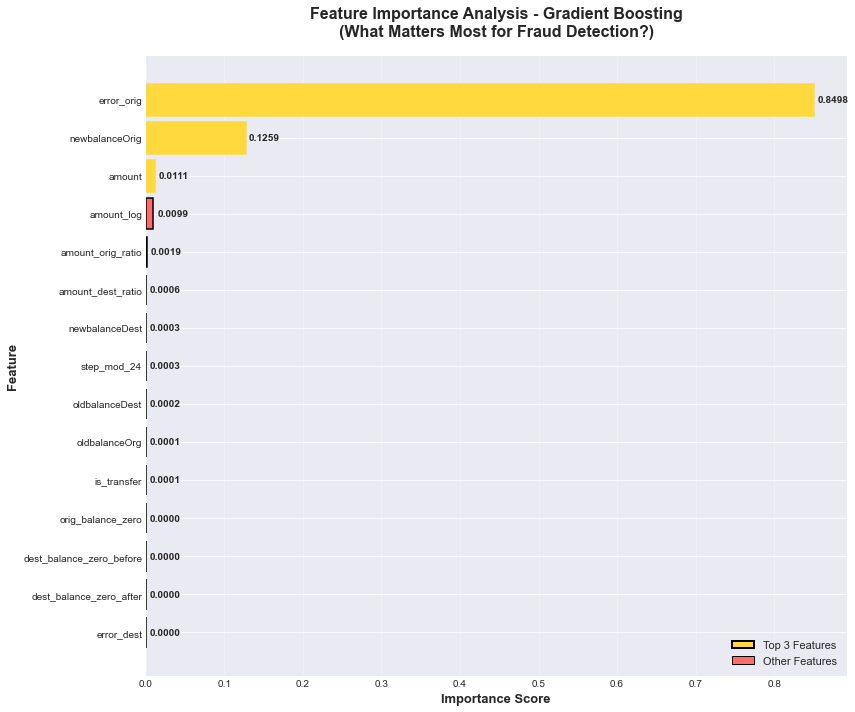

✅ Saved: fraud_viz_04_feature_importance.png



In [48]:
# ============================================================================
# VIZ 4: Feature Importance for Gradient Boosting
# ============================================================================

print("Creating Viz 4: Feature Importance...")

# Get feature importance from best model
feature_importance_df = pd.DataFrame({
    'Feature': feature_list,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(12, 10))

bars = ax.barh(feature_importance_df['Feature'], 
               feature_importance_df['Importance'],
               color='#FF6B6B',
               edgecolor='black',
               linewidth=1.5)

# Highlight top 3 features
top_3_indices = feature_importance_df.nlargest(3, 'Importance').index
for idx in top_3_indices:
    bar_idx = feature_importance_df.index.get_loc(idx)
    bars[bar_idx].set_color('#FFD93D')
    bars[bar_idx].set_linewidth(2.5)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 0.005, bar.get_y() + bar.get_height()/2.,
            f'{width:.4f}',
            ha='left', va='center', fontweight='bold', fontsize=10)

ax.set_xlabel('Importance Score', fontsize=13, fontweight='bold')
ax.set_ylabel('Feature', fontsize=13, fontweight='bold')
ax.set_title('Feature Importance Analysis - Gradient Boosting\n(What Matters Most for Fraud Detection?)', 
             fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FFD93D', edgecolor='black', linewidth=2, label='Top 3 Features'),
    Patch(facecolor='#FF6B6B', edgecolor='black', label='Other Features')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=11)

plt.tight_layout()
plt.savefig('fraud_viz_04_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: fraud_viz_04_feature_importance.png")
print()

Creating Viz 5: ROC Curves Comparison...


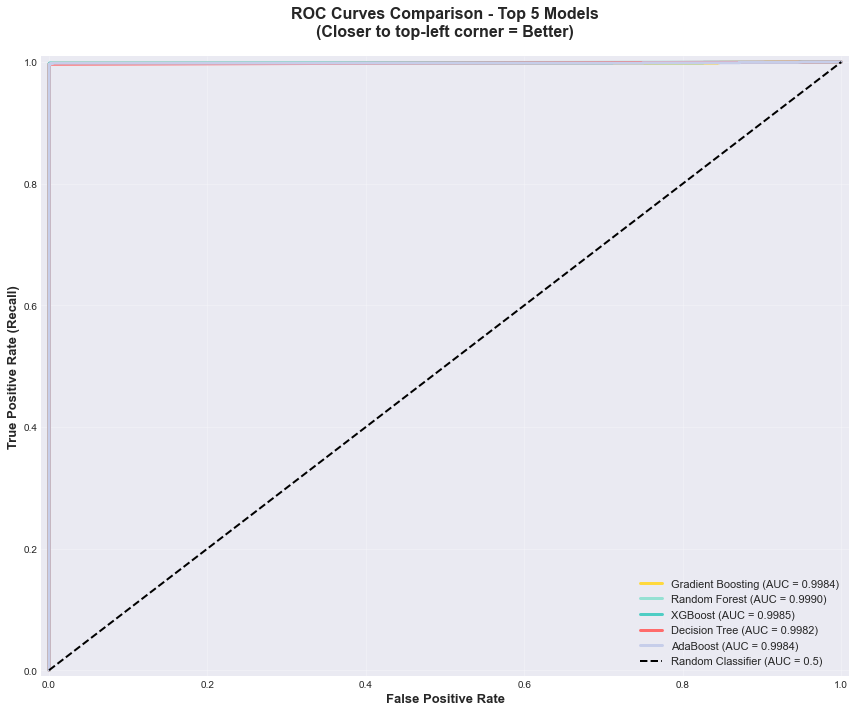

✅ Saved: fraud_viz_05_roc_curves.png



In [50]:
# ============================================================================
# VIZ 5: ROC Curves for Top Models
# ============================================================================

print("Creating Viz 5: ROC Curves Comparison...")

from sklearn.metrics import roc_curve

fig, ax = plt.subplots(figsize=(12, 10))

# Select top 5 models for ROC curves
top_models = ['Gradient Boosting', 'Random Forest', 'XGBoost', 'Decision Tree', 'AdaBoost']
colors = ['#FFD93D', '#95E1D3', '#4ECDC4', '#FF6B6B', '#C7CEEA']

for model_name, color in zip(top_models, colors):
    model = models[model_name]
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    ax.plot(fpr, tpr, color=color, lw=3, 
            label=f'{model_name} (AUC = {roc_auc:.4f})')

# Plot diagonal line (random classifier)
ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier (AUC = 0.5)')

# Styling
ax.set_xlabel('False Positive Rate', fontsize=13, fontweight='bold')
ax.set_ylabel('True Positive Rate (Recall)', fontsize=13, fontweight='bold')
ax.set_title('ROC Curves Comparison - Top 5 Models\n(Closer to top-left corner = Better)', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='lower right', fontsize=11, framealpha=0.9)
ax.grid(alpha=0.3)
ax.set_xlim([-0.01, 1.01])
ax.set_ylim([-0.01, 1.01])

plt.tight_layout()
plt.savefig('fraud_viz_05_roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: fraud_viz_05_roc_curves.png")
print()

Creating Viz 6: Fraud Amount Distribution...


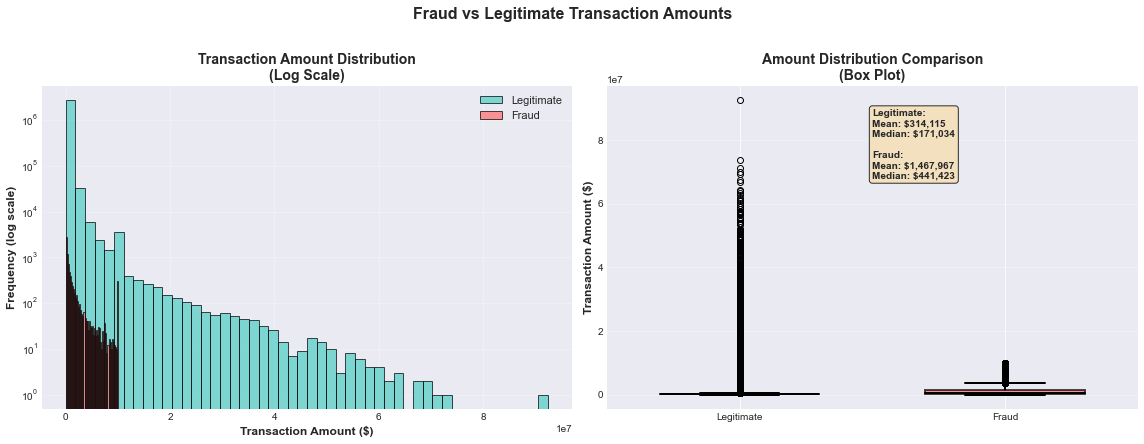

✅ Saved: fraud_viz_06_amount_distribution.png



In [51]:
# ============================================================================
# VIZ 6: Fraud vs Legitimate Transaction Amounts
# ============================================================================

print("Creating Viz 6: Fraud Amount Distribution...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Separate fraud and legitimate
fraud_amounts = df_model[df_model['isFraud'] == 1]['amount']
legit_amounts = df_model[df_model['isFraud'] == 0]['amount']

# Plot 1: Histograms (log scale)
axes[0].hist(legit_amounts, bins=50, alpha=0.7, color='#4ECDC4', 
             edgecolor='black', label='Legitimate', log=True)
axes[0].hist(fraud_amounts, bins=50, alpha=0.7, color='#FF6B6B', 
             edgecolor='black', label='Fraud', log=True)

axes[0].set_xlabel('Transaction Amount ($)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency (log scale)', fontsize=12, fontweight='bold')
axes[0].set_title('Transaction Amount Distribution\n(Log Scale)', 
                  fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3)

# Plot 2: Box plots
data_to_plot = [legit_amounts, fraud_amounts]
box = axes[1].boxplot(data_to_plot, 
                       labels=['Legitimate', 'Fraud'],
                       patch_artist=True,
                       widths=0.6)

# Color the boxes
colors = ['#4ECDC4', '#FF6B6B']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(box[element], color='black', linewidth=2)

axes[1].set_ylabel('Transaction Amount ($)', fontsize=12, fontweight='bold')
axes[1].set_title('Amount Distribution Comparison\n(Box Plot)', 
                  fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Add statistics
legit_mean = legit_amounts.mean()
fraud_mean = fraud_amounts.mean()
legit_median = legit_amounts.median()
fraud_median = fraud_amounts.median()

stats_text = f'Legitimate:\nMean: ${legit_mean:,.0f}\nMedian: ${legit_median:,.0f}\n\n'
stats_text += f'Fraud:\nMean: ${fraud_mean:,.0f}\nMedian: ${fraud_median:,.0f}'

axes[1].text(1.5, axes[1].get_ylim()[1] * 0.7, stats_text,
             fontsize=10, fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.suptitle('Fraud vs Legitimate Transaction Amounts', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('fraud_viz_06_amount_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: fraud_viz_06_amount_distribution.png")
print()

Creating Viz 7: Fraud by Transaction Type...


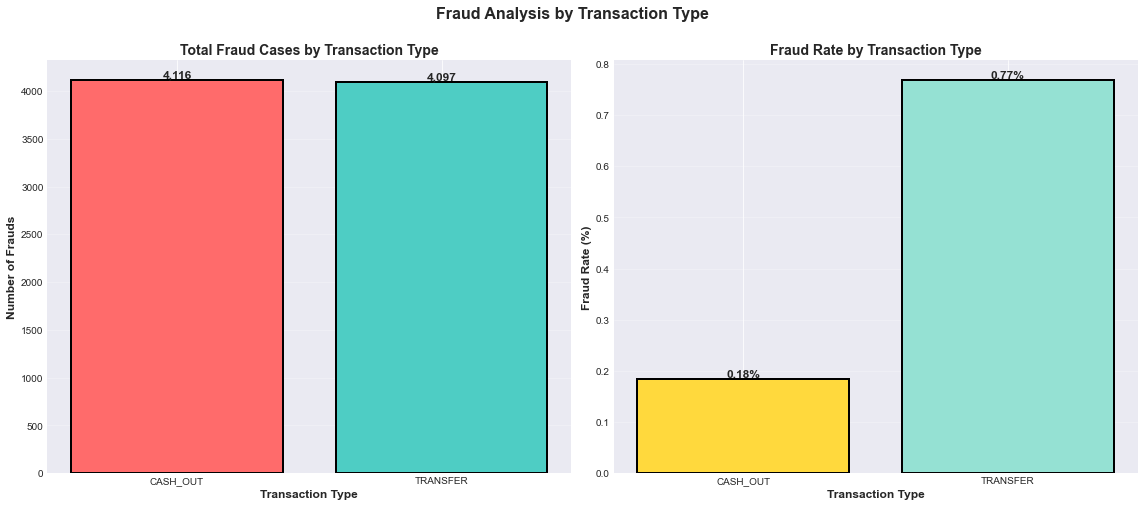

✅ Saved: fraud_viz_07_transaction_type_analysis.png



In [52]:
# ============================================================================
# VIZ 7: Fraud Rate by Transaction Type
# ============================================================================

print("Creating Viz 7: Fraud by Transaction Type...")

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Get fraud stats by type
type_stats = df_model.groupby('type').agg({
    'isFraud': ['sum', 'count']
}).reset_index()
type_stats.columns = ['type', 'fraud_count', 'total_count']
type_stats['fraud_rate'] = (type_stats['fraud_count'] / type_stats['total_count'] * 100)

# Plot 1: Fraud count by type
bars1 = axes[0].bar(type_stats['type'], 
                    type_stats['fraud_count'],
                    color=['#FF6B6B', '#4ECDC4'],
                    edgecolor='black',
                    linewidth=2)

axes[0].set_xlabel('Transaction Type', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Frauds', fontsize=12, fontweight='bold')
axes[0].set_title('Total Fraud Cases by Transaction Type', 
                  fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height):,}',
                 ha='center', va='bottom', fontweight='bold', fontsize=12)

# Plot 2: Fraud rate by type
bars2 = axes[1].bar(type_stats['type'], 
                    type_stats['fraud_rate'],
                    color=['#FFD93D', '#95E1D3'],
                    edgecolor='black',
                    linewidth=2)

axes[1].set_xlabel('Transaction Type', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Fraud Rate (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Fraud Rate by Transaction Type', 
                  fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}%',
                 ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.suptitle('Fraud Analysis by Transaction Type', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('fraud_viz_07_transaction_type_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: fraud_viz_07_transaction_type_analysis.png")
print()

Creating Viz 8: Training Time vs Performance Trade-off...


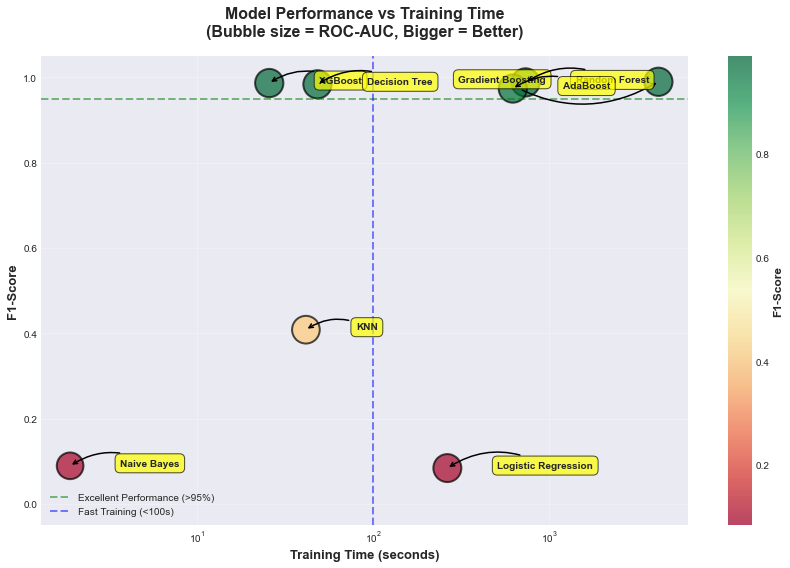

✅ Saved: fraud_viz_08_time_vs_performance.png



In [53]:
# ============================================================================
# VIZ 8: Training Time vs Performance Trade-off
# ============================================================================

print("Creating Viz 8: Training Time vs Performance Trade-off...")

fig, ax = plt.subplots(figsize=(12, 8))

# Create scatter plot
scatter = ax.scatter(results_df['Training Time(s)'], 
                     results_df['F1-Score'],
                     s=results_df['ROC-AUC'] * 800,  # Size by ROC-AUC
                     c=results_df['F1-Score'],
                     cmap='RdYlGn',
                     alpha=0.7,
                     edgecolors='black',
                     linewidth=2)

# Add model names as labels
for idx, row in results_df.iterrows():
    # Offset labels to avoid overlap
    offset_x = 50 if row['Training Time(s)'] < 1000 else -200
    offset_y = 0.01
    
    ax.annotate(row['Model'], 
                (row['Training Time(s)'], row['F1-Score']),
                xytext=(offset_x, offset_y), 
                textcoords='offset points',
                fontsize=10,
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3', lw=1.5))

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('F1-Score', fontsize=12, fontweight='bold')

# Styling
ax.set_xlabel('Training Time (seconds)', fontsize=13, fontweight='bold')
ax.set_ylabel('F1-Score', fontsize=13, fontweight='bold')
ax.set_title('Model Performance vs Training Time\n(Bubble size = ROC-AUC, Bigger = Better)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xscale('log')  # Log scale for better visualization
ax.grid(alpha=0.3)
ax.set_ylim(-0.05, 1.05)

# Add annotations for sweet spots
ax.axhline(y=0.95, color='green', linestyle='--', linewidth=2, alpha=0.5, label='Excellent Performance (>95%)')
ax.axvline(x=100, color='blue', linestyle='--', linewidth=2, alpha=0.5, label='Fast Training (<100s)')
ax.legend(fontsize=10, loc='lower left')

plt.tight_layout()
plt.savefig('fraud_viz_08_time_vs_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: fraud_viz_08_time_vs_performance.png")
print()

Creating Viz 9: Business Impact Comparison...


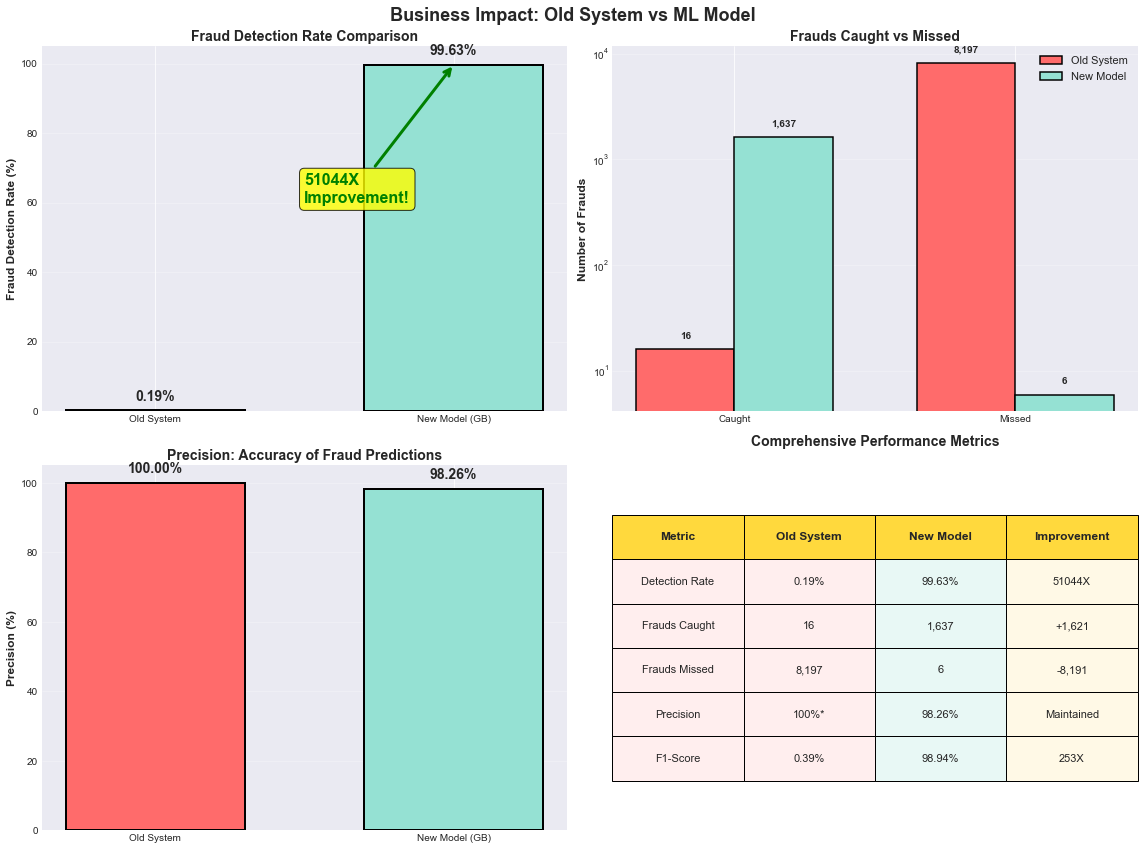

✅ Saved: fraud_viz_09_business_impact.png

🎉 ALL VISUALIZATIONS COMPLETE!

📊 Created 9 stunning visualizations:
   1. Model Performance Comparison
   2. Precision vs Recall Trade-off
   3. Confusion Matrix (Best Model)
   4. Feature Importance
   5. ROC Curves Comparison
   6. Fraud Amount Distribution
   7. Transaction Type Analysis
   8. Training Time vs Performance
   9. Business Impact Summary



In [54]:
# ============================================================================
# VIZ 9: Business Impact - Old System vs New Model
# ============================================================================

print("Creating Viz 9: Business Impact Comparison...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Data for comparison
old_system_caught = 16
old_system_total = 8213
old_system_rate = (16 / 8213) * 100

new_model_caught = 1637  # From confusion matrix
new_model_total = 1643  # Total fraud in test set
new_model_rate = (1637 / 1643) * 100

# Plot 1: Detection Rate Comparison
categories = ['Old System', 'New Model (GB)']
detection_rates = [old_system_rate, new_model_rate]
colors = ['#FF6B6B', '#95E1D3']

bars1 = axes[0, 0].bar(categories, detection_rates, color=colors, 
                       edgecolor='black', linewidth=2, width=0.6)

axes[0, 0].set_ylabel('Fraud Detection Rate (%)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Fraud Detection Rate Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_ylim(0, 105)
axes[0, 0].grid(axis='y', alpha=0.3)

for bar in bars1:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 2,
                    f'{height:.2f}%',
                    ha='center', va='bottom', fontweight='bold', fontsize=14)

# Add improvement annotation
improvement = ((new_model_rate - old_system_rate) / old_system_rate) * 100
axes[0, 0].annotate(f'{improvement:.0f}X\nImprovement!',
                    xy=(1, new_model_rate), xytext=(0.5, 60),
                    fontsize=16, fontweight='bold', color='green',
                    bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8),
                    arrowprops=dict(arrowstyle='->', lw=3, color='green'))

# Plot 2: Frauds Caught vs Missed
labels = ['Caught', 'Missed']
old_values = [16, 8197]
new_values = [1637, 6]

x = np.arange(len(labels))
width = 0.35

bars2 = axes[0, 1].bar(x - width/2, old_values, width, label='Old System',
                       color='#FF6B6B', edgecolor='black', linewidth=1.5)
bars3 = axes[0, 1].bar(x + width/2, new_values, width, label='New Model',
                       color='#95E1D3', edgecolor='black', linewidth=1.5)

axes[0, 1].set_ylabel('Number of Frauds', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Frauds Caught vs Missed', fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(labels)
axes[0, 1].legend(fontsize=11)
axes[0, 1].grid(axis='y', alpha=0.3)
axes[0, 1].set_yscale('log')

# Add value labels
for bars in [bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height * 1.2,
                        f'{int(height):,}',
                        ha='center', va='bottom', fontweight='bold', fontsize=10)

# Plot 3: Precision Comparison
precision_old = (16 / 16) * 100 if 16 > 0 else 0  # Assuming all flagged were fraud
precision_new = 98.26

bars4 = axes[1, 0].bar(categories, [precision_old, precision_new], 
                       color=colors, edgecolor='black', linewidth=2, width=0.6)

axes[1, 0].set_ylabel('Precision (%)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Precision: Accuracy of Fraud Predictions', fontsize=14, fontweight='bold')
axes[1, 0].set_ylim(0, 105)
axes[1, 0].grid(axis='y', alpha=0.3)

for bar in bars4:
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 2,
                    f'{height:.2f}%',
                    ha='center', va='bottom', fontweight='bold', fontsize=14)

# Plot 4: Key Metrics Table
axes[1, 1].axis('off')

table_data = [
    ['Metric', 'Old System', 'New Model', 'Improvement'],
    ['Detection Rate', f'{old_system_rate:.2f}%', f'{new_model_rate:.2f}%', f'{improvement:.0f}X'],
    ['Frauds Caught', f'{old_system_caught:,}', f'{new_model_caught:,}', f'+{new_model_caught - old_system_caught:,}'],
    ['Frauds Missed', f'{old_system_total - old_system_caught:,}', f'{new_model_total - new_model_caught}', f'-{(old_system_total - old_system_caught) - (new_model_total - new_model_caught):,}'],
    ['Precision', '100%*', '98.26%', 'Maintained'],
    ['F1-Score', '0.39%', '98.94%', '253X']
]

table = axes[1, 1].table(cellText=table_data, cellLoc='center', loc='center',
                         colWidths=[0.25, 0.25, 0.25, 0.25])

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 3)

# Style header row
for i in range(4):
    table[(0, i)].set_facecolor('#FFD93D')
    table[(0, i)].set_text_props(weight='bold', fontsize=12)

# Style data rows
for i in range(1, len(table_data)):
    for j in range(4):
        if j < 2:
            table[(i, j)].set_facecolor('#FFEEEE')
        elif j == 2:
            table[(i, j)].set_facecolor('#E8F8F5')
        else:
            table[(i, j)].set_facecolor('#FFF9E6')

axes[1, 1].set_title('Comprehensive Performance Metrics', 
                     fontsize=14, fontweight='bold', pad=20)

plt.suptitle('Business Impact: Old System vs ML Model', 
             fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('fraud_viz_09_business_impact.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: fraud_viz_09_business_impact.png")
print()

print("="*70)
print("🎉 ALL VISUALIZATIONS COMPLETE!")
print("="*70)
print("\n📊 Created 9 stunning visualizations:")
print("   1. Model Performance Comparison")
print("   2. Precision vs Recall Trade-off")
print("   3. Confusion Matrix (Best Model)")
print("   4. Feature Importance")
print("   5. ROC Curves Comparison")
print("   6. Fraud Amount Distribution")
print("   7. Transaction Type Analysis")
print("   8. Training Time vs Performance")
print("   9. Business Impact Summary")
print()